In [1]:
import numpy as np 
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

In [2]:
len("np.linspace()")

13

In [3]:
len("list(range())-1")

15

In [4]:
Nx = 30
Ny = 30

beta = Nx/Ny
Nk = Nx*Ny

M = np.eye(Nk)
b = np.zeros((Nk, 1))

ccA = list(range(0, Nk, Nx)) # A es borde de la izquierda, ojo con el limite superior!
ccB = list(range(0,Nx)) # B es borde de abajo
ccC = list(range(Nx-1, Nk, Ny)) # borde derecha
ccD = list(range(Nk-Nx,Nk)) # borde superior

#cc = {'TA':75, 'TB':100 , 'TC':50, 'TD':0}
cc = {'TA':75, 'TB':0 , 'TC':50, 'TD':100}
cc_tipo = {'A':'temp','B':'temp','C':'temp','D':'temp'}

for k in range(Nk):
    if k==0:
        if cc_tipo['A']=='temp'  and cc_tipo['B'] == 'flujo':
#            b[k] = TC['A']
            b[k] = cc['TA']
        elif cc_tipo['B']=='temp'  and cc_tipo['A'] == 'flujo':
#            b[k] = TC['B']
            b[k] = cc['TB']
        else:
#            b[k]= (TC['A']+TC['B'])/2
            b[k]= (cc['TA']+cc['TB'])/2
    elif k==(Nx-1): # En los vértices siempre nos quedamos con el borde que tiene temperatura fija.
        if cc_tipo['C']=='temp'  and cc_tipo['B'] == 'flujo':
#            b[k] = TC['C']
            b[k] = cc['TC']
        elif cc_tipo['B']=='temp'  and cc_tipo['C'] == 'flujo':
#            b[k] = TC['B']
            b[k] = cc['TB']
        else:
#            b[k]= (TC['C']+TC['B'])/2
            b[k]= (cc['TC']+cc['TB'])/2
    elif k==Nx-1:
        print(k)
        b[k] = (cc['TB']+cc['TC'])/2
    
        
    elif k==(Nk-Nx-1):
        b[k] = (cc['TA']+cc['TD'])/2
    elif k==(Nk-1):
        b[k] = (cc['TD']+cc['TC'])/2
    elif k in ccA:
        b[k] = cc['TA']
    elif k in ccC:
        b[k] = cc['TC'] #cc['TD']
    elif k in ccB:
        b[k] = cc['TB']
    elif k in ccD:
        b[k] = cc['TD'] #cc['TC']
    else:
        M[k,k]= -2*(1+ beta**2)
        M[k,k-1]= 1
        M[k,k+1]= 1
        M[k,k-Nx]= beta**2
        M[k,k+Nx]= beta**2

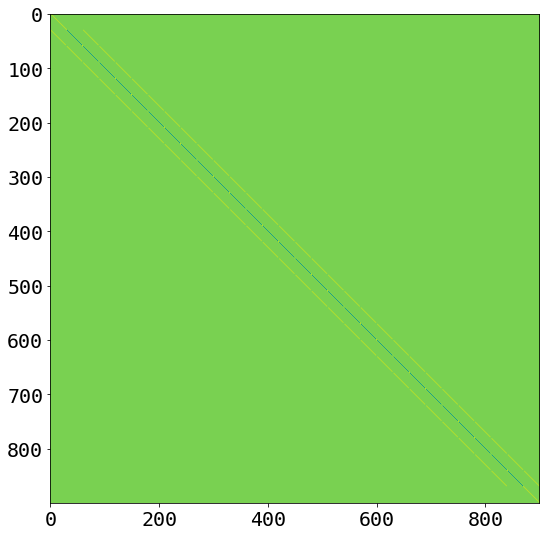

In [5]:
plt.imshow(M)

In [6]:
T = np.linalg.solve(M,b)
T = T.reshape((Nx,Ny)) 

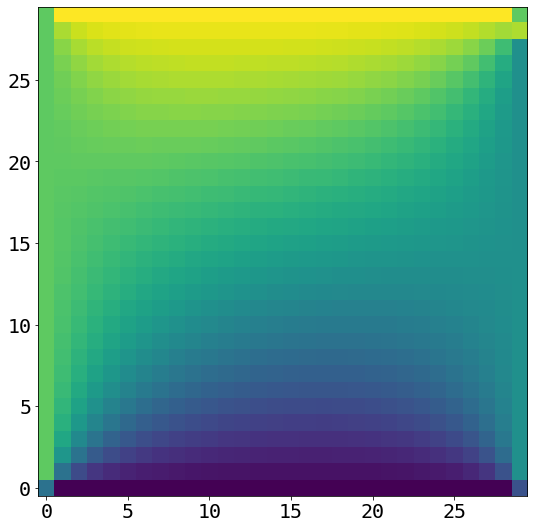

In [9]:
plt.imshow(T, origin='lower')

Text(0, 0.5, 'j')

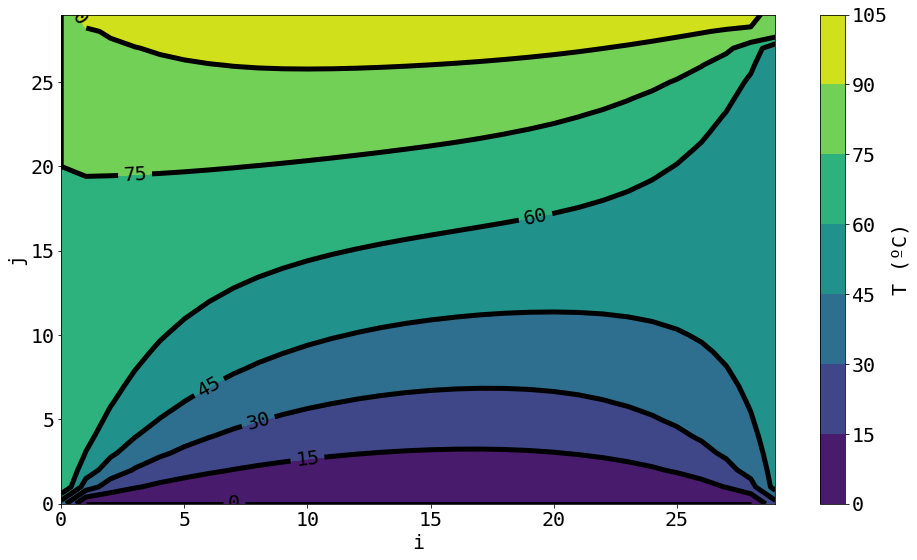

In [8]:
fig, ax = plt.subplots()
mappable = ax.contourf(T)
levels = ax.contour(T, colors='k', linewidths=5)
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')